In [1]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import interp
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, roc_curve, auc, roc_auc_score, make_scorer, plot_precision_recall_curve

%matplotlib inline

%run utils.py
%run plots.py

/Users/taahase8/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
X, y = load_fraud_data()

## Fitting a model

In [3]:
logistic_regression = LogisticRegression(class_weight='balanced',
                                         fit_intercept=True,
                                         intercept_scaling=1,
                                         max_iter=500)

parameters = {
    'C': [0, .3, .6, .9, 1],
    'solver': ('liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga')
}
clf = GridSearchCV(logistic_regression,
                   param_grid=parameters,
                   cv=StratifiedKFold(n_splits=5),
                   scoring=make_scorer(score_evaluation))

# some combinations are invalid and would produce noisy warnings
warnings.filterwarnings('ignore')
model = clf.fit(X, y)
warnings.filterwarnings('default') 

print('best params', model.best_params_)
print('score', model.score(X, y))

best params {'C': 1, 'solver': 'lbfgs'}
score -405


In [4]:
clf = LogisticRegression(solver='lbfgs',
                         penalty='l2',
                         class_weight='balanced',
                         fit_intercept=True,
                         intercept_scaling=1,
                         max_iter=500)

/Users/taahase8/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:415: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_min = np.asscalar(a_min.astype(scaled_dtype))
/Users/taahase8/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:416: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_max = np.asscalar(a_max.astype(scaled_dtype))


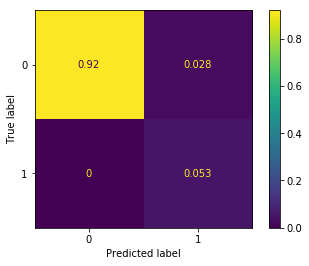

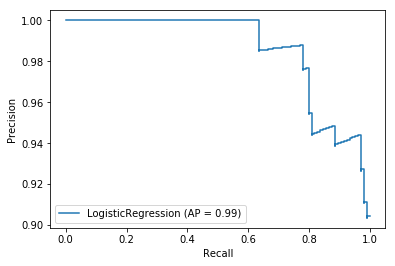

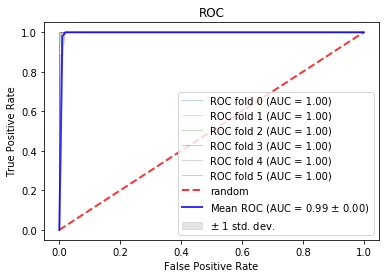

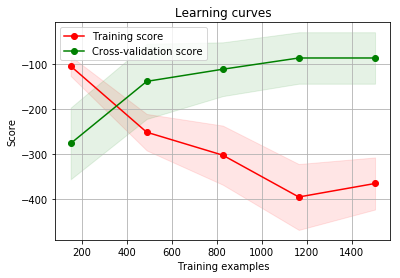

In [5]:
plot_classifier(clf, X, y)

max score: 77.77777777777777
threshold: 0.91


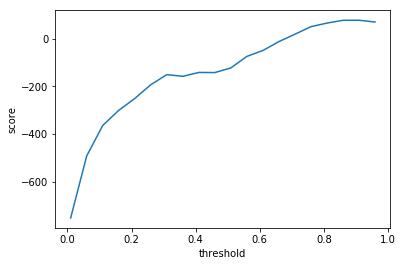

In [6]:
def predictor(X_test):
    return model.predict_proba(X_test)[:,1]

max_score, best_threshold = find_best_thresh(predictor, X, y)

## Final score

In [7]:
get_test_score(predictor, best_threshold)

44605